<a href="https://colab.research.google.com/github/shpark02084/TensorFlow/blob/main/Computer_Vision_Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Try to build a deep learning model from a large set of images of cats and dogs

Following steps


1.   Using TensorFlow Datasets to download and explore data
2.   Creating preprocessing function for our data
3.   Batching & preparing datasets for modelling
4.   Build a CNN model using Stochastic Gradient Descent Optimizer
5.   Build a CNN model using Adam Optimizer


In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds


In [2]:
#split data into 70% train, 30% test
split_data = ['train[:70%]', 'train[70%:]']

(train_data, test_data), ds_info = tfds.load(name="cats_vs_dogs", 
                                             split=split_data, 
                                             shuffle_files=True, 
                                             as_supervised=True, 
                                             with_info=True)



In [3]:
# Get info
ds_info.features


FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'image/filename': Text(shape=(), dtype=tf.string),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
})

In [4]:
# Get label
class_names = ds_info.features["label"].names
class_names

['cat', 'dog']

In [5]:
# Take one sample
sample = train_data.take(1) 
for image, label in sample:
  print(f"""
  Class name : {class_names[label.numpy()]}
        """)


  Class name : dog
        


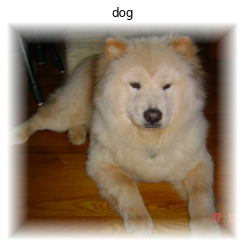

In [6]:
# Visualize
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

In [7]:
# Resize 
INPUT_SIZE = 224
def preprocessing(image, label):
  
    return tf.image.resize(image, [INPUT_SIZE, INPUT_SIZE]) / 255, label

In [8]:
train_data = train_data.map(preprocessing).batch(32)
test_data = test_data.map(preprocessing).batch(32)


## Model 1

In [9]:
# Model 1 CNN
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

In [10]:
# Compile 
model_1.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Fit
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
509/509 [==============================] - 46s 78ms/step - loss: 0.6794 - accuracy: 0.5670 - val_loss: 0.6653 - val_accuracy: 0.6055
Epoch 2/5
509/509 [==============================] - 34s 68ms/step - loss: 0.6469 - accuracy: 0.6202 - val_loss: 0.6493 - val_accuracy: 0.6107
Epoch 3/5
509/509 [==============================] - 34s 67ms/step - loss: 0.6111 - accuracy: 0.6638 - val_loss: 0.5919 - val_accuracy: 0.6836
Epoch 4/5
509/509 [==============================] - 35s 68ms/step - loss: 0.5661 - accuracy: 0.7062 - val_loss: 0.5648 - val_accuracy: 0.7094
Epoch 5/5
509/509 [==============================] - 46s 90ms/step - loss: 0.5397 - accuracy: 0.7245 - val_loss: 0.5594 - val_accuracy: 0.7187


In [12]:
model_1.evaluate(test_data)

219/219 [==============================] - 9s 42ms/step - loss: 0.5594 - accuracy: 0.7187


[0.5593653321266174, 0.7187275886535645]

Model 1 Accuracy : 0.7187%

In [13]:
model_1.save('model_1.h5')

## Model 2

In [14]:
# Model 2 CNN with ADAM optimizer
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"), 
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])
# Compile 
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
509/509 [==============================] - 35s 68ms/step - loss: 0.6185 - accuracy: 0.6414 - val_loss: 0.5428 - val_accuracy: 0.7222
Epoch 2/5
509/509 [==============================] - 35s 68ms/step - loss: 0.5135 - accuracy: 0.7475 - val_loss: 0.5166 - val_accuracy: 0.7474
Epoch 3/5
509/509 [==============================] - 35s 68ms/step - loss: 0.4494 - accuracy: 0.7897 - val_loss: 0.5511 - val_accuracy: 0.7480
Epoch 4/5
509/509 [==============================] - 34s 67ms/step - loss: 0.3919 - accuracy: 0.8251 - val_loss: 0.6059 - val_accuracy: 0.7424
Epoch 5/5
509/509 [==============================] - 34s 67ms/step - loss: 0.3387 - accuracy: 0.8562 - val_loss: 0.6119 - val_accuracy: 0.7528


In [15]:
model_2.evaluate(test_data)

219/219 [==============================] - 9s 41ms/step - loss: 0.6119 - accuracy: 0.7528


[0.6118977069854736, 0.752829909324646]

In [16]:
model_2.save('model_2.h5')

Model 2 Accuracy 75.28%